<a href="https://colab.research.google.com/github/Kba-hub-cell/AfricitizenDatascientist/blob/main/0_Devoir_TP/Genie_Industriel/1_Sujet_resolu/industrial-accident-causal-analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 style="text-align:center;font-size:200%;;">Industrial Accident Causal Analysis </h2>
<h3  style="text-align:center;">Keywords : <span class="label label-success">Manufacturing</span> <span class="label label-success">EDA</span> <span class="label label-success">Visualization</span> <span class="label label-success">Feature Engineering</span> <span class="label label-success">NLP</span> <span class="label label-success">Causal Analysis</span> <span class="label label-success">Sentiment Analysis</span></h3>

## Table of Contents<a id='top'></a>
>1. [Overview](#1.-Overview)  
>    * [Project Detail](#Project-Detail)
>    * [Goal of this notebook](#Goal-of-this-notebook)
>1. [Import libraries](#2.-Import-libraries)
>1. [Load the dataset](#3.-Load-the-dataset)
>1. [Pre-processing](#4.-Pre-processing)
>    * [NLP Pre-processing](#NLP-Pre-processing)
>    * [Sentiment Analysis](#Sentiment-Analysis)
>1. [EDA](#5.-EDA)  
>    * [Univariate Analysis](#Univariate-Analysis)
>    * [Multivariate Analysis](#Multivariate-Analysis)
>    * [NLP Analysis](#NLP-Analysis)
>1. [Modeling](#6.-Modeling)
>    * [Feature Engineering](#Feature-Engineering)
>    * [Case1 : Accident Level](#Case1-:-Accident-Level)
>    * [Case2 : Potential Accident Level](#Case2-:-Potential-Accident-Level)
>1. [Conclusion](#7.-Conclusion)
>    * [Task Submission](#Task-Submission)
>1. [References](#8.-References)

# 1. Overview
## Project Detail
>In [this dataset](https://www.kaggle.com/ihmstefanini/industrial-safety-and-health-analytics-database), the information about accidents in 12 manufacturing plants in 3 countries are given by a brazilian company, [IHM Stefanini](https://en.ihm.com.br/). We need to use this dataset to understand why accidents occur, and discover clues to reduce tragedic accidents.<br/>
><p>Dataset columns are below:</p>
><ul>
><li><b>Date</b> : timestamp or time/date information</li>
><li><b>Countries</b> : which country the accident occurred (<b>anonymized</b>)</li>
><li><b>Local</b> : the city where the manufacturing plant is located (<b>anonymized</b>)</li>
><li><b>Industry sector</b> : which sector the plant belongs to</li>
><li><b>Accident level</b> : from I to VI, it registers how severe was the accident (I means not severe but VI means very severe)</li>
><li><b>Potential Accident Level</b> : Depending on the Accident Level, the database also registers how severe the accident could have been (due to other factors involved in the accident)</li>
><li><b>Genre</b> : if the person is male of female</li>
><li><b>Employee or Third Party</b> : if the injured person is an employee or a third party</li>
><li><b>Critical Risk</b> : some description of the risk involved in the accident</li>
><li><b>Description</b> : Detailed description of how the accident happened</li>
></ul>

## Goal of this notebook
>* Practice Pre-processing technique
    * Time-related feature extraction
    * NLP pre-precessing(lower-casing, lemmatizing, stemming and removing stopwords)
>* Practice EDA technique
>* Practice visualising technique(especially using bokeh via holoviews)
>* Practice feature enginieering technique
>    * Time-related features
>    * NLP features(TF-IDF)
>* Practice modeling technique
>    * LightGBM(+ plotting the tree)
>* Causal analysis skill

<a href="#top" class="btn btn-success btn-sm active" role="button" aria-pressed="true" style="color:white;">Table of Contents</a>

# 2. Import libraries

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
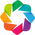

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import tokenize,stem
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
import lightgbm as lgb
import nltk
from nltk.util import ngrams
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS
import shap
shap.initjs()

<a href="#top" class="btn btn-success btn-sm active" role="button" aria-pressed="true" style="color:white;">Table of Contents</a>

# 3. Load the dataset

In [8]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [9]:
df = pd.read_csv("/kaggle/input/industrial-safety-and-health-analytics-database/IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv")
df.head(3)

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/industrial-safety-and-health-analytics-database/IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv'

In [10]:
df.drop("Unnamed: 0", axis=1, inplace=True)
df.rename(columns={'Data':'Date', 'Countries':'Country', 'Genre':'Gender', 'Employee or Third Party':'Employee type'}, inplace=True)
df.head(3)

NameError: name 'df' is not defined

<a href="#top" class="btn btn-success btn-sm active" role="button" aria-pressed="true" style="color:white;">Table of Contents</a>

# 4. Pre-processing

>Accidents may increase or decrease throughout the year or month, so I added datetime features such as year,month and day.

In [11]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].apply(lambda x : x.year)
df['Month'] = df['Date'].apply(lambda x : x.month)
df['Day'] = df['Date'].apply(lambda x : x.day)
df['Weekday'] = df['Date'].apply(lambda x : x.day_name())
df['WeekofYear'] = df['Date'].apply(lambda x : x.weekofyear)
df.head(3)

NameError: name 'df' is not defined

### Seasonal variable
><div class="alert alert-success" role="alert">
>Accordin to <a href='https://www.kaggle.com/ihmstefanini/industrial-safety-and-health-analytics-database/discussion/54113'>this discussion</a>, countries where the dataset was collected is anonymized but they are all located in South America. So in this analysis, let's assume the dataset was collected in Brazil.<br/>
>It is said in <a href='https://seasonsyear.com/Brazil'>this web page</a> that Brazil has four climatological seasons as below.
><ul>
>    <li><b>Spring</b> : September to November</li>
>    <li><b>Summer</b> : December to February</li>
>    <li><b>Autumn</b> : March to May</li>
>    <li><b>Winter</b> : June to August</li>
></ul>
>We can create seasonal variable based on month variable.
></div>

>function to convert month variable into seasons

In [ ]:
def month2seasons(x):
    if x in [9, 10, 11]:
        season = 'Spring'
    elif x in [12, 1, 2]:
        season = 'Summer'
    elif x in [3, 4, 5]:
        season = 'Autumn'
    elif x in [6, 7, 8]:
        season = 'Winter'
    return season

In [ ]:
df['Season'] = df['Month'].apply(month2seasons)
df.head(3)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description,Year,Month,Day,Weekday,WeekofYear,Season
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,53,Summer
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,2,Saturday,53,Summer
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,6,Wednesday,1,Summer


## NLP Pre-processing
>Description column contains the details of why accidents happend. So I tried to add new features by using this important information with NLP technique.

>In addition to the predifined stopwords in WORDCLOUD, I defined handmade-stopwords list by inspecting the documents in 'Description' column.

In [ ]:
STOPWORDS.update(["cm", "kg", "mr", "wa" ,"nv", "ore", "da", "pm", "am", "cx"])
print(STOPWORDS)

{'such', 'an', 'theirs', 'there', "don't", 'these', "i'm", "let's", 'just', 'her', 'own', 'ours', "we'd", 'were', "she'll", 'r', 'while', 'under', 'where', 'to', 'yours', "hasn't", "where's", 'are', "what's", "we've", 'pm', 'also', 'only', 'other', 'be', "i'd", 'of', 'did', "didn't", 'i', "how's", 'could', 'why', 'cx', 'with', "weren't", 'against', "shouldn't", 'some', 'k', "doesn't", 'then', 'about', 'if', 'com', 'been', 'here', "isn't", 'this', 'me', 'you', 'itself', 'so', 'mr', "he'll", 'herself', 'during', 'shall', 'in', "that's", 'few', 'a', 'below', 'your', 'therefore', "haven't", 'when', 'hence', 'has', 'nor', 'cm', 'out', 'doing', 'their', 'themselves', "they'll", 'kg', 'down', 'being', 'no', 'nv', "can't", "aren't", 'my', 'once', 'ought', 'ore', "you're", "we'll", 'through', 'what', 'off', 'whom', 'any', 'can', 'http', "you've", 'but', 'more', 'most', 'than', 'however', "won't", 'like', 'the', 'very', "you'll", 'ever', "she'd", 'which', "shan't", 'those', 'since', 'he', 'until

>NLP preprocessing pipeline is a little complicated, so I made preprocessing function.

In [ ]:
def nlp_preprocesser(row):
    sentence = row.Description
    #convert all characters to lowercase
    lowered = sentence.lower()
    tok = tokenize.word_tokenize(lowered)

    #lemmatizing & stemming
    lemmatizer = stem.WordNetLemmatizer()
    lem = [lemmatizer.lemmatize(i) for i in tok if i not in STOPWORDS]
    stemmer = stem.PorterStemmer()
    stems = [stemmer.stem(i) for i in lem if i not in STOPWORDS]

    #remove non-alphabetical characters like '(', '.' or '!'
    alphas = [i for i in stems if i.isalpha() and (i not in STOPWORDS)]
    return " ".join(alphas)

>convert text into applicable format by lower-casing, tokenizing, lemmatizing and stemming.

In [ ]:
df['Description_processed'] = df.apply(nlp_preprocesser, axis=1)
df.head(3)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description,Year,Month,Day,Weekday,WeekofYear,Season,Description_processed
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,53,Summer,remov drill rod jumbo mainten supervisor proce...
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,2,Saturday,53,Summer,activ sodium sulphid pump pipe uncoupl sulfid ...
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,6,Wednesday,1,Summer,milpo locat level collabor excav work pick han...


## Sentiment Analysis
>Positiveness or negativeness of the description of accidents may be related with their severeness.

In [ ]:
def sentiment2score(text):
    analyzer = SentimentIntensityAnalyzer()
    sent_score = analyzer.polarity_scores(text)["compound"]
    return float(sent_score)

In [ ]:
df['Description_sentiment_score'] = df['Description'].apply(lambda x: sentiment2score(x))
df.head(3)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description,Year,Month,Day,Weekday,WeekofYear,Season,Description_processed,Description_sentiment_score
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,53,Summer,remov drill rod jumbo mainten supervisor proce...,0.7845
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,2,Saturday,53,Summer,activ sodium sulphid pump pipe uncoupl sulfid ...,0.2732
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,6,Wednesday,1,Summer,milpo locat level collabor excav work pick han...,0.0000


<a href="#top" class="btn btn-success btn-sm active" role="button" aria-pressed="true" style="color:white;">Table of Contents</a>

# 5. EDA

## Univariate Analysis

### Country

In [ ]:
country_cnt = np.round(df['Country'].value_counts(normalize=True) * 100)
hv.Bars(country_cnt).opts(title="Country Count", color="green", xlabel="Countries", ylabel="Percentage", yformatter='%d%%')\
                .opts(opts.Bars(width=500, height=300,tools=['hover'],show_grid=True))\
            * hv.Text('Country_01', 15, f"{int(country_cnt.loc['Country_01'])}%")\
            * hv.Text('Country_02', 15, f"{int(country_cnt.loc['Country_02'])}%")\
            * hv.Text('Country_03', 15, f"{int(country_cnt.loc['Country_03'])}%")

:Overlay
   .Bars.I   :Bars   [index]   (Country)
   .Text.I   :Text   [x,y]
   .Text.II  :Text   [x,y]
   .Text.III :Text   [x,y]

### Local

In [ ]:
local_cnt = np.round(df['Local'].value_counts(normalize=True) * 100)
hv.Bars(local_cnt).opts(title="Local Count", color="green", xlabel="Locals", ylabel="Percentage", yformatter='%d%%')\
                .opts(opts.Bars(width=700, height=300,tools=['hover'],show_grid=True))

:Bars   [index]   (Local)

### Industry Sector

In [ ]:
sector_cnt = np.round(df['Industry Sector'].value_counts(normalize=True) * 100)
hv.Bars(sector_cnt).opts(title="Industry Sector Count", color="green", xlabel="Sectors", ylabel="Percentage", yformatter='%d%%')\
                .opts(opts.Bars(width=500, height=300,tools=['hover'],show_grid=True))\
                * hv.Text('Mining', 15, f"{int(sector_cnt.loc['Mining'])}%")\
                * hv.Text('Metals', 15, f"{int(sector_cnt.loc['Metals'])}%")\
                * hv.Text('Others', 15, f"{int(sector_cnt.loc['Others'])}%")

:Overlay
   .Bars.I   :Bars   [index]   (Industry Sector)
   .Text.I   :Text   [x,y]
   .Text.II  :Text   [x,y]
   .Text.III :Text   [x,y]

<a href="#top" class="btn btn-success btn-sm active" role="button" aria-pressed="true" style="color:white;">Table of Contents</a>

### Accident Levels
><div class="alert alert-success" role="alert">
><ul>
>    <li>The number of accidents decreases as the Accident Level increases.</li>
>    <li>The number of accidents increases as the Potential Accident Level decreases.</li>
></ul>
></div>

In [ ]:
ac_level_cnt = np.round(df['Accident Level'].value_counts(normalize=True) * 100)
pot_ac_level_cnt = np.round(df['Potential Accident Level'].value_counts(normalize=True) * 100, decimals=1)
ac_pot = pd.concat([ac_level_cnt, pot_ac_level_cnt], axis=1,sort=False).fillna(0).rename(columns={'Accident Level':'Accident', 'Potential Accident Level':'Potential'})
ac_pot = pd.melt(ac_pot.reset_index(), ['index']).rename(columns={'index':'Severity', 'variable':'Levels'})
hv.Bars(ac_pot, ['Severity', 'Levels'], 'value').opts(opts.Bars(title="Accident Levels Count", width=700, height=300,tools=['hover'],\
                                                                show_grid=True,xrotation=45, ylabel="Percentage", yformatter='%d%%'))

:Bars   [Severity,Levels]   (value)

### Gender
><div class="alert alert-success" role="alert">
><ul>
><li>As a characteristic of the industry, the proportion of men is overwhelmingly.</li>
></ul>
></div>

In [ ]:
gender_cnt = np.round(df['Gender'].value_counts(normalize=True) * 100)
hv.Bars(gender_cnt).opts(title="Gender Count", color="green", xlabel="Gender", ylabel="Percentage", yformatter='%d%%')\
                .opts(opts.Bars(width=500, height=300,tools=['hover'],show_grid=True))

:Bars   [index]   (Gender)

### Employee type
><div class="alert alert-success" role="alert">
><ul>
><li>The large number of Third Party employee type indicates the difference of employement system in gender or industry sector.</li>
></ul>
></div>

In [ ]:
emp_type_cnt = np.round(df['Employee type'].value_counts(normalize=True) * 100)
hv.Bars(emp_type_cnt).opts(title="Employee type Count", color="green", xlabel="Employee Type", ylabel="Percentage", yformatter='%d%%')\
                .opts(opts.Bars(width=500, height=300,tools=['hover'],show_grid=True))

:Bars   [index]   (Employee type)

<a href="#top" class="btn btn-success btn-sm active" role="button" aria-pressed="true" style="color:white;">Table of Contents</a>

### Critical Risks
><div class="alert alert-success" role="alert">
><ul>
><li>Because most part of the Critical Risks are classified as 'Others', it is thought that there are too many risks to classify precisely</li>
><li>And it is also thought that it takes so many time to analyze risks and reasons why the accidents occur.</li>
></ul>
></div>

In [ ]:
cr_risk_cnt = np.round(df['Critical Risk'].value_counts(normalize=True) * 100)
hv.Bars(cr_risk_cnt[::-1]).opts(title="Critical Risk Count", color="green", xlabel="Critical Risks", ylabel="Percentage", xformatter='%d%%')\
                .opts(opts.Bars(width=600, height=600,tools=['hover'],show_grid=True,invert_axes=True))

:Bars   [index]   (Critical Risk)

### Calendar
><div class="alert alert-success" role="alert">
><ul>
><li>It seems that the number of accidents decreased in latter of the year / month.</li>
><li>The number of accidents increased during the middle of the week and declined since the middle of the week.</li>
></ul>
></div>

In [ ]:
year_cnt = np.round(df['Year'].value_counts(normalize=True,sort=False) * 100)
y = hv.Bars(year_cnt).opts(title="Year Count", color="green", xlabel="Years")
month_cnt = np.round(df['Month'].value_counts(normalize=True,sort=False) * 100)
m = hv.Bars(month_cnt).opts(title="Month Count", color="skyblue", xlabel="Months") * hv.Curve(month_cnt).opts(color='red', line_width=3)
day_cnt = np.round(df['Day'].value_counts(normalize=True,sort=False) * 100)
d = hv.Bars(day_cnt).opts(title="Day Count", color="skyblue", xlabel="Days") * hv.Curve(day_cnt).opts(color='red', line_width=3)
weekday_cnt = pd.DataFrame(np.round(df['Weekday'].value_counts(normalize=True,sort=False) * 100))
weekday_cnt['week_num'] = [['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'].index(i) for i in weekday_cnt.index]
weekday_cnt.sort_values('week_num', inplace=True)
w = hv.Bars((weekday_cnt.index, weekday_cnt.Weekday)).opts(title="Weekday Count", color="green", xlabel="Weekdays") * hv.Curve(weekday_cnt['Weekday']).opts(color='red', line_width=3)
(y + m + d + w).opts(opts.Bars(width=400, height=300,tools=['hover'],show_grid=True, ylabel="Percentage", yformatter='%d%%')).cols(2)

:Layout
   .Bars.I      :Bars   [index]   (Year)
   .Overlay.I   :Overlay
      .Bars.I  :Bars   [index]   (Month)
      .Curve.I :Curve   [index]   (Month)
   .Overlay.II  :Overlay
      .Bars.I  :Bars   [index]   (Day)
      .Curve.I :Curve   [index]   (Day)
   .Overlay.III :Overlay
      .Bars.I  :Bars   [x]   (y)
      .Curve.I :Curve   [index]   (Weekday)

### Season
><div class="alert alert-success" role="alert">
><ul>
><li>The number of accidents increased in Summer and Autumn.</li>
><li>It is thought that the occurrence of accidents is related to the climate(especially tempeature).</li>
></ul>
></div>

In [ ]:
season_cnt = pd.DataFrame(np.round(df['Season'].value_counts(normalize=True,sort=False) * 100).reset_index())
season_cnt['season_order'] = season_cnt['index'].apply(lambda x: ['Spring','Summer','Autumn','Winter'].index(x))
season_cnt.sort_values('season_order', inplace=True)
season_cnt.index = season_cnt['index']
season_cnt.drop(['index','season_order'], axis=1, inplace=True)
hv.Bars(season_cnt).opts(title="Season Count", color="green", xlabel="Season", ylabel="Percentage", yformatter='%d%%')\
                .opts(opts.Bars(width=500, height=300,tools=['hover'],show_grid=True))

:Bars   [index]   (Season)

<a href="#top" class="btn btn-success btn-sm active" role="button" aria-pressed="true" style="color:white;">Table of Contents</a>

## Multivariate Analysis

### Industry Sector by Countries
><div class="alert alert-success" role="alert">
><ul>
><li>We can see that there are major industries by countries.</li><br/>
><li><b>Country_01</b> : Mining</li>
><li><b>Country_02</b> : Metals</li>
><li><b>Country_03</b> : Others</li>
></ul>
></div>

In [ ]:
f = lambda x : np.round(x/x.sum() * 100)
con_sector = df.groupby(['Country','Industry Sector'])['Industry Sector'].count().unstack().apply(f, axis=1)
hv.Bars(pd.melt(con_sector.reset_index(), ['Country']), ['Country', 'Industry Sector'], 'value').opts(opts.Bars(title="Industry Sector by Countries Count", width=800, height=300,tools=['hover'],\
                                                                show_grid=True,xrotation=0, ylabel="Percentage", yformatter='%d%%'))

:Bars   [Country,Industry Sector]   (value)

###  Employee type by Gender
><div class="alert alert-success" role="alert">
><ul>
><li>Ratio of employee types by gender is not different in each gender.</li>
><li>The proportion of female with Third Party(Remote) is slightly higher than that of males.</li>
><li>It is thought that this is because <u>males have more on-site work and females often do work far away from relatively safe sites</u>.</li>
></ul>
></div>

In [ ]:
f = lambda x : np.round(x/x.sum() * 100)
em_gen = df.groupby(['Gender','Employee type'])['Employee type'].count().unstack().apply(f, axis=1)
hv.Bars(pd.melt(em_gen.reset_index(), ['Gender']), ['Gender','Employee type'], 'value').opts(opts.Bars(title="Employee type by Gender Count", width=800, height=300,tools=['hover'],\
                                                                show_grid=True,xrotation=0, ylabel="Percentage", yformatter='%d%%'))

:Bars   [Gender,Employee type]   (value)

### Industry Sector by Gender
><div class="alert alert-success" role="alert">
><ul>
><li>There are differences mainly in metals and mining between males and females.</li>
><li>Same as employee type above, it is thought that <u>this is due to different safety level by industry sector</u>.</li>
></ul>
></div>

In [ ]:
f = lambda x : np.round(x/x.sum() * 100)
em_gen = df.groupby(['Gender','Industry Sector'])['Industry Sector'].count().unstack().apply(f, axis=1)
hv.Bars(pd.melt(em_gen.reset_index(), ['Gender']), ['Gender','Industry Sector'], 'value').opts(opts.Bars(title="Industry Sector by Gender Count", width=800, height=300,tools=['hover'],\
                                                                show_grid=True,xrotation=0, ylabel="Percentage", yformatter='%d%%'))

:Bars   [Gender,Industry Sector]   (value)

<a href="#top" class="btn btn-success btn-sm active" role="button" aria-pressed="true" style="color:white;">Table of Contents</a>

### Accident Levels by Gender
><div class="alert alert-success" role="alert">
><ul>
><li>In terms of <b>accident levels</b>, there are many mild risks at general accident level, but many serious risks at potential accident level.
    <p>It can be said that <u>many potential accidents are overlooked and potentially high-risk accidents are possible</u>.</p></li>
><li>In terms of <b>gender</b>, the general trend is the same, but males have a higher accident levels than females.
    <p>Same as discussion above, it is thought that <u>this is due to different safety level by industry sector</u>.</p></li>
></ul>
></div>

In [ ]:
f = lambda x : np.round(x/x.sum() * 100)
ac_gen = df.groupby(['Gender','Accident Level'])['Accident Level'].count().unstack().apply(f, axis=1)
ac = hv.Bars(pd.melt(ac_gen.reset_index(), ['Gender']), ['Gender','Accident Level'], 'value').opts(opts.Bars(title="Accident Level by Gender Count"))
pot_ac_gen = df.groupby(['Gender','Potential Accident Level'])['Potential Accident Level'].count().unstack().apply(f, axis=1)
pot_ac = hv.Bars(pd.melt(pot_ac_gen.reset_index(), ['Gender']), ['Gender','Potential Accident Level'], 'value').opts(opts.Bars(title="Potential Accident Level by Gender Count"))
(ac + pot_ac).opts(opts.Bars(width=400, height=300,tools=['hover'],show_grid=True,xrotation=0, ylabel="Percentage", yformatter='%d%%'))

:Layout
   .Bars.I  :Bars   [Gender,Accident Level]   (value)
   .Bars.II :Bars   [Gender,Potential Accident Level]   (value)

### Accident Levels by Employee type
><div class="alert alert-success" role="alert">
><ul>
><li>For both accident levels, the incidence of Employee is higher at low accident levels, but <u>the incidence of Third parties seems to be slightly higher at <b>high accident levels</b></u>.</li>
></ul>
></div>

In [ ]:
f = lambda x : np.round(x/x.sum() * 100)
ac_em = df.groupby(['Employee type','Accident Level'])['Accident Level'].count().unstack().apply(f, axis=1)
ac = hv.Bars(pd.melt(ac_em.reset_index(), ['Employee type']), ['Employee type','Accident Level'], 'value').opts(opts.Bars(title="Accident Level by Employee type Count"))
pot_ac_em = df.groupby(['Employee type','Potential Accident Level'])['Potential Accident Level'].count().unstack().apply(f, axis=1)
pot_ac = hv.Bars(pd.melt(pot_ac_em.reset_index(), ['Employee type']), ['Employee type','Potential Accident Level'], 'value').opts(opts.Bars(title="Potential Accident Level by Employee type Count"))
(ac + pot_ac).opts(opts.Bars(width=400, height=300,tools=['hover'],show_grid=True,xrotation=0, ylabel="Percentage", yformatter='%d%%',fontsize={'title':9}))

:Layout
   .Bars.I  :Bars   [Employee type,Accident Level]   (value)
   .Bars.II :Bars   [Employee type,Potential Accident Level]   (value)

<a href="#top" class="btn btn-success btn-sm active" role="button" aria-pressed="true" style="color:white;">Table of Contents</a>

### Accident Levels by Month
><div class="alert alert-success" role="alert">
><ul>
><li>Both of the two accident level have the tendency that non-severe levels decreased throughout the year, <u>but severe levels did not changed much, and some of these levels increased slightly in the second half of the year</u>.</li>
><li>The fact above seems to be related to <b>the skill level of the employees</b>, and <u>while their experiences can reduce minor mistakes, sometimes they can make serious mistakes accidentally</u>.</li>
></ul>
></div>

In [ ]:
f = lambda x : np.round(x/x.sum() * 100)
ac_mo = df.groupby(['Month','Accident Level'])['Accident Level'].count().unstack().apply(f, axis=1).fillna(0)
ac = hv.Curve(ac_mo['I'], label='I') * hv.Curve(ac_mo['II'], label='II') * hv.Curve(ac_mo['III'], label='III') * hv.Curve(ac_mo['IV'], label='IV') * hv.Curve(ac_mo['V'], label='V')\
        .opts(opts.Curve(title="Accident Level by Month Count"))
pot_ac_mo = df.groupby(['Month','Potential Accident Level'])['Potential Accident Level'].count().unstack().apply(f, axis=1).fillna(0)
pot_ac = hv.Curve(pot_ac_mo['I'], label='I') * hv.Curve(pot_ac_mo['II'], label='II') * hv.Curve(pot_ac_mo['III'], label='III') * hv.Curve(pot_ac_mo['IV'], label='IV')\
        * hv.Curve(pot_ac_mo['V'], label='V') * hv.Curve(pot_ac_mo['VI'], label='VI').opts(opts.Curve(title="Potential Accident Level by Month Count"))
(ac+pot_ac).opts(opts.Curve(width=800, height=300,tools=['hover'],show_grid=True, ylabel="Percentage", yformatter='%d%%')).cols(1)

:Layout
   .Overlay.I  :Overlay
      .Curve.I   :Curve   [Month]   (I)
      .Curve.II  :Curve   [Month]   (II)
      .Curve.III :Curve   [Month]   (III)
      .Curve.IV  :Curve   [Month]   (IV)
      .Curve.V   :Curve   [Month]   (V)
   .Overlay.II :Overlay
      .Curve.I   :Curve   [Month]   (I)
      .Curve.II  :Curve   [Month]   (II)
      .Curve.III :Curve   [Month]   (III)
      .Curve.IV  :Curve   [Month]   (IV)
      .Curve.V   :Curve   [Month]   (V)
      .Curve.VI  :Curve   [Month]   (VI)

### Accident Levels by Weekday
><div class="alert alert-success" role="alert">
><ul>
><li>Both of the two accident level is thought that non-severe levels decreased in the first and the last of the week, but severe levels did not changed much.</li>
><li>It can be said that <u>employees' experiences against work can reduce minor mistakes</u>.</li>
></ul>
></div>

In [ ]:
f = lambda x : np.round(x/x.sum() * 100)
ac_weekday = df.groupby(['Weekday','Accident Level'])['Accident Level'].count().unstack().apply(f, axis=1).fillna(0)
ac_weekday['week_num'] = [['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'].index(i) for i in ac_weekday.index]
ac_weekday.sort_values('week_num', inplace=True)
ac_weekday.drop('week_num', axis=1, inplace=True)
ac = hv.Curve(ac_weekday['I'], label='I') * hv.Curve(ac_weekday['II'], label='II') * hv.Curve(ac_weekday['III'], label='III') * hv.Curve(ac_weekday['IV'], label='IV') * hv.Curve(ac_weekday['V'], label='V')\
        .opts(opts.Curve(title="Accident Level by Weekday Count"))
pot_ac_weekday = df.groupby(['Weekday','Potential Accident Level'])['Potential Accident Level'].count().unstack().apply(f, axis=0).fillna(0)
pot_ac_weekday['week_num'] = [['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'].index(i) for i in pot_ac_weekday.index]
pot_ac_weekday.sort_values('week_num', inplace=True)
pot_ac_weekday.drop('week_num', axis=1, inplace=True)
pot_ac = hv.Curve(pot_ac_weekday['I'], label='I') * hv.Curve(pot_ac_weekday['II'], label='II') * hv.Curve(pot_ac_weekday['III'], label='III') * hv.Curve(pot_ac_weekday['IV'], label='IV')\
        * hv.Curve(pot_ac_weekday['V'], label='V') * hv.Curve(pot_ac_weekday['VI'], label='VI').opts(opts.Curve(title="Potential Accident Level by Weekday Count"))
(ac+pot_ac).opts(opts.Curve(width=800, height=300,tools=['hover'],show_grid=True, ylabel="Percentage", yformatter='%d%%')).cols(1)

:Layout
   .Overlay.I  :Overlay
      .Curve.I   :Curve   [Weekday]   (I)
      .Curve.II  :Curve   [Weekday]   (II)
      .Curve.III :Curve   [Weekday]   (III)
      .Curve.IV  :Curve   [Weekday]   (IV)
      .Curve.V   :Curve   [Weekday]   (V)
   .Overlay.II :Overlay
      .Curve.I   :Curve   [Weekday]   (I)
      .Curve.II  :Curve   [Weekday]   (II)
      .Curve.III :Curve   [Weekday]   (III)
      .Curve.IV  :Curve   [Weekday]   (IV)
      .Curve.V   :Curve   [Weekday]   (V)
      .Curve.VI  :Curve   [Weekday]   (VI)

### Accident Levels by Season
><div class="alert alert-success" role="alert">
><ul>
><li>As same as accident levels by month, both of the two accident level have the tendency that non-severe levels decreased throughout the year, <u>but severe levels did not changed much, and some of these levels increased slightly in the second half of the year</u>.</li>
></ul>
></div>

In [ ]:
f = lambda x : np.round(x/x.sum() * 100)
ac_season = df.groupby(['Season','Accident Level'])['Accident Level'].count().unstack().apply(f, axis=1).fillna(0)
ac_season['season_num'] = [['Spring', 'Summer', 'Autumn', 'Winter'].index(i) for i in ac_season.index]
ac_season.sort_values('season_num', inplace=True)
ac_season.drop('season_num', axis=1, inplace=True)
ac = hv.Curve(ac_season['I'], label='I') * hv.Curve(ac_season['II'], label='II') * hv.Curve(ac_season['III'], label='III') * hv.Curve(ac_season['IV'], label='IV') * hv.Curve(ac_season['V'], label='V')\
        .opts(opts.Curve(title="Accident Level by Season Count"))
pot_ac_season = df.groupby(['Season','Potential Accident Level'])['Potential Accident Level'].count().unstack().apply(f, axis=0).fillna(0)
pot_ac_season['season_num'] = [['Spring', 'Summer', 'Autumn', 'Winter'].index(i) for i in pot_ac_season.index]
pot_ac_season.sort_values('season_num', inplace=True)
pot_ac_season.drop('season_num', axis=1, inplace=True)
pot_ac = hv.Curve(pot_ac_season['I'], label='I') * hv.Curve(pot_ac_season['II'], label='II') * hv.Curve(pot_ac_season['III'], label='III') * hv.Curve(pot_ac_season['IV'], label='IV')\
        * hv.Curve(pot_ac_season['V'], label='V') * hv.Curve(pot_ac_season['VI'], label='VI').opts(opts.Curve(title="Potential Accident Level by Season Count"))
(ac+pot_ac).opts(opts.Curve(width=800, height=300,tools=['hover'],show_grid=True, ylabel="Percentage", yformatter='%d%%')).cols(1)

:Layout
   .Overlay.I  :Overlay
      .Curve.I   :Curve   [Season]   (I)
      .Curve.II  :Curve   [Season]   (II)
      .Curve.III :Curve   [Season]   (III)
      .Curve.IV  :Curve   [Season]   (IV)
      .Curve.V   :Curve   [Season]   (V)
   .Overlay.II :Overlay
      .Curve.I   :Curve   [Season]   (I)
      .Curve.II  :Curve   [Season]   (II)
      .Curve.III :Curve   [Season]   (III)
      .Curve.IV  :Curve   [Season]   (IV)
      .Curve.V   :Curve   [Season]   (V)
      .Curve.VI  :Curve   [Season]   (VI)

<a href="#top" class="btn btn-success btn-sm active" role="button" aria-pressed="true" style="color:white;">Table of Contents</a>

## NLP Analysis
>Description about accidents is important to understand the cause of accidents, so we need to discover characteristical words or phrases indicating situation when accidents occured.

>function to calculate ngram under several conditions

In [ ]:
def ngram_func(ngram, trg='', trg_value=''):
    #trg_value is list-object
    if (trg == '') or (trg_value == ''):
        string_filterd =  df['Description_processed'].sum().split()
    else:
        string_filterd =  df[df[trg].isin(trg_value)]['Description_processed'].sum().split()
    dic = nltk.FreqDist(nltk.ngrams(string_filterd, ngram)).most_common(30)
    ngram_df = pd.DataFrame(dic, columns=['ngram','count'])
    ngram_df.index = [' '.join(i) for i in ngram_df.ngram]
    ngram_df.drop('ngram',axis=1, inplace=True)
    return ngram_df

### Unigram
><div class="alert alert-success" role="alert">
><ul>
><li>There are several words which is related to <b>hands</b>. For example <u>left, hand, right and finger</u>.</li>
><li>Moreover there are several words which is related to <b>movement of something</b>. For example <u>hit, remov, fall and move</u>.</li>
></ul>
></div>

In [ ]:
hv.Bars(ngram_func(1)[::-1]).opts(title="Unigram Count top-30", color="red", xlabel="Unigrams", ylabel="Count")\
                .opts(opts.Bars(width=600, height=600,tools=['hover'],show_grid=True,invert_axes=True))

:Bars   [index]   (count)

### Bigram
><div class="alert alert-success" role="alert">
><ul>
><li>There are so many phrases which is related to <b>hands</b>. For example <u>left hand, right hand, finger left, finger right, middl finger and ring finger</u>.</li>
><li>There are also some phrases which is related to other body parts. For example <u>left foot and right reg</u>.</li>
></ul>
></div>

In [ ]:
hv.Bars(ngram_func(2)[::-1]).opts(title="Bigram Count top-30", color="yellow", xlabel="Bigrams", ylabel="Count")\
                .opts(opts.Bars(width=600, height=600,tools=['hover'],show_grid=True,invert_axes=True))

:Bars   [index]   (count)

### Trigram
><div class="alert alert-success" role="alert">
><ul>
><li>Like Unigram and Bigram, there are also many phrases which is related to <b>hands or other body parts</b>, but concreteness seems to increase.</li>
><li>For example <u>one hand glove, left arm uniform and wear safeti uniform</u>.</li>
></ul>
></div>

In [ ]:
hv.Bars(ngram_func(3)[::-1]).opts(title="Trigram Count top-30", color="blue", xlabel="Trigrams", ylabel="Count")\
                .opts(opts.Bars(width=600, height=600,tools=['hover'],show_grid=True,invert_axes=True))

:Bars   [index]   (count)

<a href="#top" class="btn btn-success btn-sm active" role="button" aria-pressed="true" style="color:white;">Table of Contents</a>

### Ngram with Gender

In [ ]:
uni_ma=hv.Bars(ngram_func(1, 'Gender', ['Male'])[0:15][::-1]).opts(title="Unigram with Male", color="red", xlabel="Unigrams", ylabel="Count")
uni_fe=hv.Bars(ngram_func(1, 'Gender', ['Female'])[0:15][::-1]).opts(title="Unigram with Female", color="red", xlabel="Unigrams", ylabel="Count")

bi_ma=hv.Bars(ngram_func(2, 'Gender', ['Male'])[0:15][::-1]).opts(title="Bigram with Male", color="yellow", xlabel="Bigrams", ylabel="Count")
bi_fe=hv.Bars(ngram_func(2, 'Gender', ['Female'])[0:15][::-1]).opts(title="Bigram with Female", color="yellow", xlabel="Bigrams", ylabel="Count")

tri_ma=hv.Bars(ngram_func(3, 'Gender', ['Male'])[0:15][::-1]).opts(title="Trigram with Male", color="blue", xlabel="Trigrams", ylabel="Count")
tri_fe=hv.Bars(ngram_func(3, 'Gender', ['Female'])[0:15][::-1]).opts(title="Trigram with Female", color="blue", xlabel="Trigrams", ylabel="Count")


(uni_ma + uni_fe + bi_ma + bi_fe + tri_ma + tri_fe).opts(opts.Bars(width=400, height=300,tools=['hover'],show_grid=True,invert_axes=True, shared_axes=False)).opts(shared_axes=False).cols(2)

:Layout
   .Bars.I   :Bars   [index]   (count)
   .Bars.II  :Bars   [index]   (count)
   .Bars.III :Bars   [index]   (count)
   .Bars.IV  :Bars   [index]   (count)
   .Bars.V   :Bars   [index]   (count)
   .Bars.VI  :Bars   [index]   (count)

### Ngram with Accident Level
>Classifing accident levels into two part, Low Accident Level(I,II) and High Accident Level(III,IV,V).

In [ ]:
uni_ac_lo=hv.Bars(ngram_func(1, 'Accident Level', ['I','II'])[0:15][::-1]).opts(title="Unigram with High Accident Level", color="red", xlabel="Unigrams", ylabel="Count")
uni_ac_hi=hv.Bars(ngram_func(1, 'Accident Level', ['III','IV','V'])[0:15][::-1]).opts(title="Unigram with Low Accident Level", color="red", xlabel="Unigrams", ylabel="Count")

bi_ac_lo=hv.Bars(ngram_func(2, 'Accident Level', ['I','II'])[0:15][::-1]).opts(title="Bigram with High Accident Level", color="yellow", xlabel="Bigrams", ylabel="Count")
bi_ac_hi=hv.Bars(ngram_func(2, 'Accident Level', ['III','IV','V'])[0:15][::-1]).opts(title="Bigram with Low Accident Level", color="yellow", xlabel="Bigrams", ylabel="Count")

tri_ac_lo=hv.Bars(ngram_func(3, 'Accident Level', ['I','II'])[0:15][::-1]).opts(title="Trigram with High Accident Level", color="blue", xlabel="Trigrams", ylabel="Count")
tri_ac_hi=hv.Bars(ngram_func(3, 'Accident Level', ['III','IV','V'])[0:15][::-1]).opts(title="Trigram with Low Accident Level", color="blue", xlabel="Trigrams", ylabel="Count")

(uni_ac_lo + uni_ac_hi + bi_ac_lo + bi_ac_hi + tri_ac_lo + tri_ac_hi).opts(opts.Bars(width=400, height=300,tools=['hover'],show_grid=True,invert_axes=True, shared_axes=False)).opts(shared_axes=False).cols(2)

:Layout
   .Bars.I   :Bars   [index]   (count)
   .Bars.II  :Bars   [index]   (count)
   .Bars.III :Bars   [index]   (count)
   .Bars.IV  :Bars   [index]   (count)
   .Bars.V   :Bars   [index]   (count)
   .Bars.VI  :Bars   [index]   (count)

### Ngram with Industry Sector

In [ ]:
uni_mine=hv.Bars(ngram_func(1, 'Industry Sector', ['Mining'])[0:15][::-1]).opts(title="Unigram with Mining Sector", color="red", xlabel="Unigrams", ylabel="Count")
uni_metal=hv.Bars(ngram_func(1, 'Industry Sector', ['Metals'])[0:15][::-1]).opts(title="Unigram with Metal Sector", color="red", xlabel="Unigrams", ylabel="Count")
uni_others=hv.Bars(ngram_func(1, 'Industry Sector', ['Others'])[0:15][::-1]).opts(title="Unigram with Other Sector", color="red", xlabel="Unigrams", ylabel="Count")

bi_mine=hv.Bars(ngram_func(2, 'Industry Sector', ['Mining'])[0:15][::-1]).opts(title="Bigram with Mining Sector", color="yellow", xlabel="Bigrams", ylabel="Count")
bi_metal=hv.Bars(ngram_func(2, 'Industry Sector', ['Metals'])[0:15][::-1]).opts(title="Bigram with Metal Sector", color="yellow", xlabel="Bigrams", ylabel="Count")
bi_others=hv.Bars(ngram_func(2, 'Industry Sector', ['Others'])[0:15][::-1]).opts(title="Bigram with Other Sector", color="yellow", xlabel="Bigrams", ylabel="Count")

tri_mine=hv.Bars(ngram_func(3, 'Industry Sector', ['Mining'])[0:15][::-1]).opts(title="Trigram with Mining Sector", color="blue", xlabel="Trigrams", ylabel="Count")
tri_metal=hv.Bars(ngram_func(3, 'Industry Sector', ['Metals'])[0:15][::-1]).opts(title="Trigram with Metal Sector", color="blue", xlabel="Trigrams", ylabel="Count")
tri_others=hv.Bars(ngram_func(3, 'Industry Sector', ['Others'])[0:15][::-1]).opts(title="Trigram with Other Sector", color="blue", xlabel="Trigrams", ylabel="Count")

(uni_mine + uni_metal + uni_others + bi_mine + bi_metal + bi_others + tri_mine + tri_metal + tri_others)\
            .opts(opts.Bars(width=265, height=300,tools=['hover'],show_grid=True,invert_axes=True, shared_axes=False,fontsize={'title':6.5,'labels':7,'yticks':8.5})).opts(shared_axes=False).cols(3)

:Layout
   .Bars.I    :Bars   [index]   (count)
   .Bars.II   :Bars   [index]   (count)
   .Bars.III  :Bars   [index]   (count)
   .Bars.IV   :Bars   [index]   (count)
   .Bars.V    :Bars   [index]   (count)
   .Bars.VI   :Bars   [index]   (count)
   .Bars.VII  :Bars   [index]   (count)
   .Bars.VIII :Bars   [index]   (count)
   .Bars.IX   :Bars   [index]   (count)

### Ngram with Employee type

In [ ]:
uni_emp=hv.Bars(ngram_func(1, 'Employee type', ['Employee'])[0:15][::-1]).opts(title="Unigram with Employee", color="red", xlabel="Unigrams", ylabel="Count")
uni_third=hv.Bars(ngram_func(1, 'Employee type', ['Third Party','Third Party (Remote)'])[0:15][::-1]).opts(title="Unigram with Third Party", color="red", xlabel="Unigrams", ylabel="Count")

bi_emp=hv.Bars(ngram_func(2, 'Employee type', ['Employee'])[0:15][::-1]).opts(title="Bigram with Employee", color="yellow", xlabel="Bigrams", ylabel="Count")
bi_third=hv.Bars(ngram_func(2, 'Employee type', ['Third Party','Third Party (Remote)'])[0:15][::-1]).opts(title="Bigram with Third Party", color="yellow", xlabel="Bigrams", ylabel="Count")

tri_emp=hv.Bars(ngram_func(3, 'Employee type', ['Employee'])[0:15][::-1]).opts(title="Trigram with Employee", color="blue", xlabel="Trigrams", ylabel="Count")
tri_third=hv.Bars(ngram_func(3, 'Employee type', ['Third Party','Third Party (Remote)'])[0:15][::-1]).opts(title="Trigram with Third Party", color="blue", xlabel="Trigrams", ylabel="Count")

(uni_emp + uni_third+ bi_emp + bi_third + tri_emp + tri_third).opts(opts.Bars(width=400, height=300,tools=['hover'],show_grid=True,invert_axes=True, shared_axes=False)).opts(shared_axes=False).cols(2)

:Layout
   .Bars.I   :Bars   [index]   (count)
   .Bars.II  :Bars   [index]   (count)
   .Bars.III :Bars   [index]   (count)
   .Bars.IV  :Bars   [index]   (count)
   .Bars.V   :Bars   [index]   (count)
   .Bars.VI  :Bars   [index]   (count)

### WordCloud
><div class="alert alert-success" role="alert">
><ul>
><li>As same as Ngram analysis above, there are many hand-related and movement-related words.</li>
><li><b>Hand-related</b> : left, right, hand, finger and glove</li>
><li><b>Movement-related</b> : fall, hit, carri, lift and slip</li>
></ul>
></div>

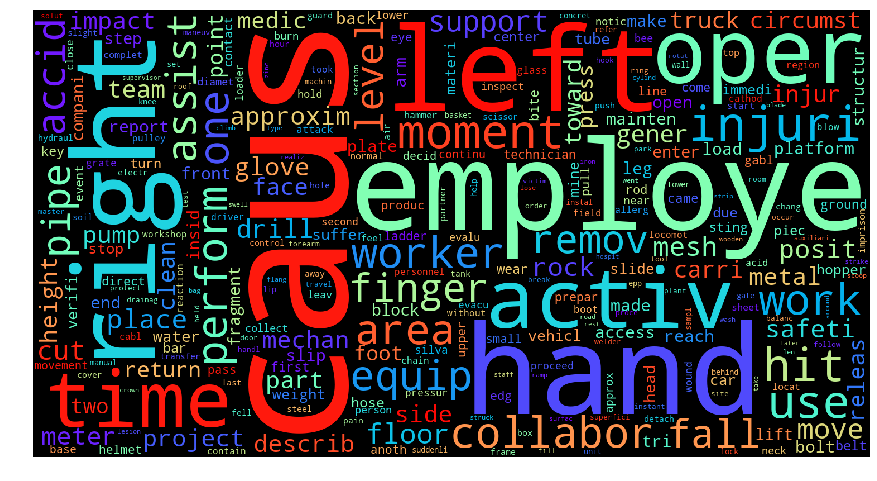

In [ ]:
wordcloud = WordCloud(width = 1500, height = 800, random_state=0, background_color='black', colormap='rainbow', \
                      min_font_size=5, max_words=300, collocations=False, min_word_length=3, stopwords = STOPWORDS).generate(" ".join(df['Description_processed'].values))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Sentiment Trend

In [ ]:
v1 = hv.Curve(df.groupby('Month')["Description_sentiment_score"].mean())\
    .opts(opts.Curve(xlabel="Month", ylabel="Sentiment Score", width=800, height=300,tools=['hover'],show_grid=True,title='Month Average Sentiment Score'))
v2 = hv.Curve(df.groupby('Weekday')["Description_sentiment_score"].mean().reindex(index=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']))\
    .opts(opts.Curve(xlabel="Weekday", ylabel="Sentiment Score", width=800, height=300,tools=['hover'],show_grid=True,title='Weekday Average Sentiment Score'))
(v1 + v2).cols(1)

:Layout
   .Curve.I  :Curve   [Month]   (Description_sentiment_score)
   .Curve.II :Curve   [Weekday]   (Description_sentiment_score)

<a href="#top" class="btn btn-success btn-sm active" role="button" aria-pressed="true" style="color:white;">Table of Contents</a>

# 6. Modeling
><div class="alert alert-success" role="alert">
>Objectives:
><ul>
><li>Presumption of cause of accidents</li>
><li>Surveying a factor that increases severity of accidents</li>
></ul>
>Building the model which classify the severity of accidents, we can understand the factor related to the causality of accidents.<br/>
>So, two models were built based on those cases below.
><ul>
><li><a href='#ac'>Case1 : Accident Level</a></li>
><li><a href='#pac'>Case2 : Potential Accident Level</a></li>
></ul>
></div>

## Feature Engineering

### TFIDF Feature

In [ ]:
feature_df = pd.DataFrame()
for i in [1,2,3]:
    vec_tfidf = TfidfVectorizer(max_features=10, norm='l2', stop_words='english', lowercase=True, use_idf=True, ngram_range=(i,i))
    X = vec_tfidf.fit_transform(df['Description_processed']).toarray()
    tfs = pd.DataFrame(X, columns=["TFIDF_" + n for n in vec_tfidf.get_feature_names()])
    feature_df = pd.concat([feature_df, tfs], axis=1)
feature_df = pd.concat([df, feature_df], axis=1)
feature_df.head(3)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description,...,TFIDF_caus injuri describ,TFIDF_describ time accid,TFIDF_finger left hand,TFIDF_finger right hand,TFIDF_gener describ injuri,TFIDF_hand caus injuri,TFIDF_injuri time accid,TFIDF_right hand caus,TFIDF_time accid employe,TFIDF_time accid worker
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Label Encoding

In [ ]:
feature_df['Country'] = LabelEncoder().fit_transform(feature_df['Country']).astype(np.int8)
feature_df['Local'] = LabelEncoder().fit_transform(feature_df['Local']).astype(np.int8)
feature_df['Industry Sector'] = LabelEncoder().fit_transform(feature_df['Industry Sector']).astype(np.int8)
feature_df['Accident Level'] = LabelEncoder().fit_transform(feature_df['Accident Level']).astype(np.int8)
feature_df['Potential Accident Level'] = LabelEncoder().fit_transform(feature_df['Potential Accident Level']).astype(np.int8)
feature_df['Gender'] = LabelEncoder().fit_transform(feature_df['Gender']).astype(np.int8)
feature_df['Employee type'] = LabelEncoder().fit_transform(feature_df['Employee type']).astype(np.int8)
feature_df['Critical Risk'] = LabelEncoder().fit_transform(feature_df['Critical Risk']).astype(np.int8)
feature_df['Weekday'] = LabelEncoder().fit_transform(feature_df['Weekday']).astype(np.int8)
feature_df['Season'] = LabelEncoder().fit_transform(feature_df['Season']).astype(np.int8)
feature_df.drop(['Date','Description', 'Description_processed'],axis=1,inplace=True)
feature_df.head(3)

,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Year,Month,...,TFIDF_caus injuri describ,TFIDF_describ time accid,TFIDF_finger left hand,TFIDF_finger right hand,TFIDF_gener describ injuri,TFIDF_hand caus injuri,TFIDF_injuri time accid,TFIDF_right hand caus,TFIDF_time accid employe,TFIDF_time accid worker
0,0,0,1,0,3,1,1,20,2016,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,1,0,3,1,0,21,2016,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,2,1,0,2,1,2,15,2016,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<a href="#top" class="btn btn-success btn-sm active" role="button" aria-pressed="true" style="color:white;">Table of Contents</a>

## Case1 : Accident Level<a id='ac'></a>
><div class="alert alert-success" role="alert">
><ul>
><li>There are many time-series features with high importance such as <b>Day, Weekday and Month</b>, and it is thought that <u>the occurrence of accidents and the accident level will change  easily depending on the time</u>.</li>
><li><u>Sentiment score is much related with accident level.</u> Sentiment score is calculated based on specific words in text, so it is thought that specific words may increase severness of accident level.</li>
><li>Since there are many TFIDF features with high importance related to a part of the body, and in particular many features are related to the hands such as <b>hand, left and right</b>, so it is considered that <u>mistakes in manual work are related to the occurrence and severity of accidents</u>.</li>
></ul>
></div>

In [ ]:
y_series = feature_df['Accident Level']
x_df = feature_df.drop(['Accident Level','Potential Accident Level'], axis=1)
X_train, X_valid, Y_train, Y_valid = train_test_split(x_df, y_series, test_size=0.2, random_state=0, stratify=y_series)

lgb_train = lgb.Dataset(X_train, Y_train)
lgb_valid = lgb.Dataset(X_valid, Y_valid, reference=lgb_train)

In [ ]:
params = {
    'task' : 'train',
    'boosting' : 'gbdt',
    'objective': 'multiclass',
    'num_class': 5,
    'metric': 'multi_logloss',
    'num_leaves': 200,
    'feature_fraction': 1.0,
    'bagging_fraction': 1.0,
    'bagging_freq': 0,
    'min_child_samples': 5
}
gbm_ac = lgb.train(params,
            lgb_train,
            num_boost_round=100,
            valid_sets=lgb_valid,
            early_stopping_rounds=100)

[1]	valid_0's multi_logloss: 0.911456
Training until validation scores don't improve for 100 rounds
[2]	valid_0's multi_logloss: 0.909909
[3]	valid_0's multi_logloss: 0.903139
[4]	valid_0's multi_logloss: 0.904543
[5]	valid_0's multi_logloss: 0.906537
[6]	valid_0's multi_logloss: 0.908884
[7]	valid_0's multi_logloss: 0.906656
[8]	valid_0's multi_logloss: 0.901869
[9]	valid_0's multi_logloss: 0.903249
[10]	valid_0's multi_logloss: 0.904567
[11]	valid_0's multi_logloss: 0.907949
[12]	valid_0's multi_logloss: 0.910283
[13]	valid_0's multi_logloss: 0.916457
[14]	valid_0's multi_logloss: 0.919015
[15]	valid_0's multi_logloss: 0.919722
[16]	valid_0's multi_logloss: 0.924115
[17]	valid_0's multi_logloss: 0.927378
[18]	valid_0's multi_logloss: 0.929972
[19]	valid_0's multi_logloss: 0.936595
[20]	valid_0's multi_logloss: 0.936635
[21]	valid_0's multi_logloss: 0.941011
[22]	valid_0's multi_logloss: 0.947949
[23]	valid_0's multi_logloss: 0.952516
[24]	valid_0's multi_logloss: 0.959308
[25]	valid_

/opt/conda/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


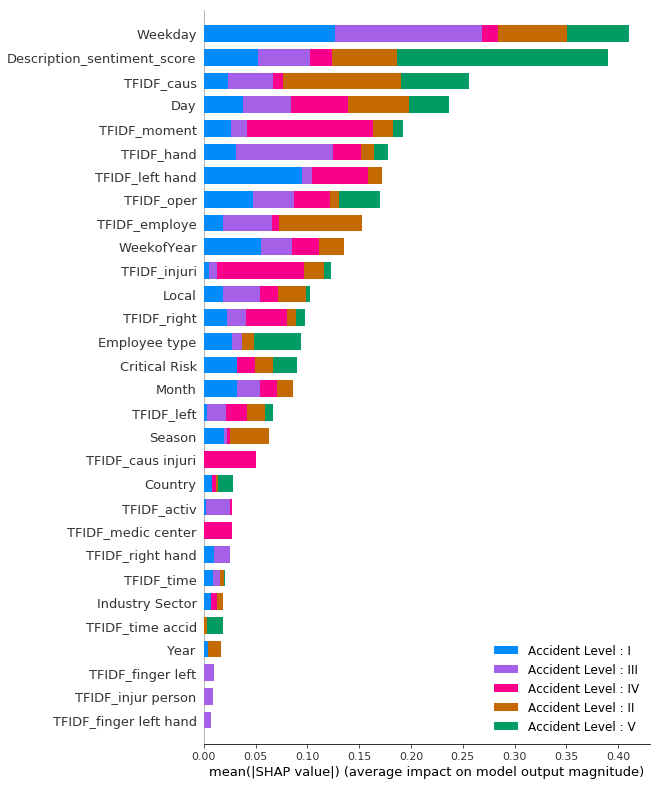

In [ ]:
ac_label = ['Accident Level : I','Accident Level : II','Accident Level : III','Accident Level : IV','Accident Level : V']
explainer = shap.TreeExplainer(model=gbm_ac)
shap_values_ac = explainer.shap_values(X=X_train)
shap.summary_plot(shap_values=shap_values_ac, features=X_train, feature_names=X_train.columns, plot_type="bar", max_display=30, class_names=ac_label)

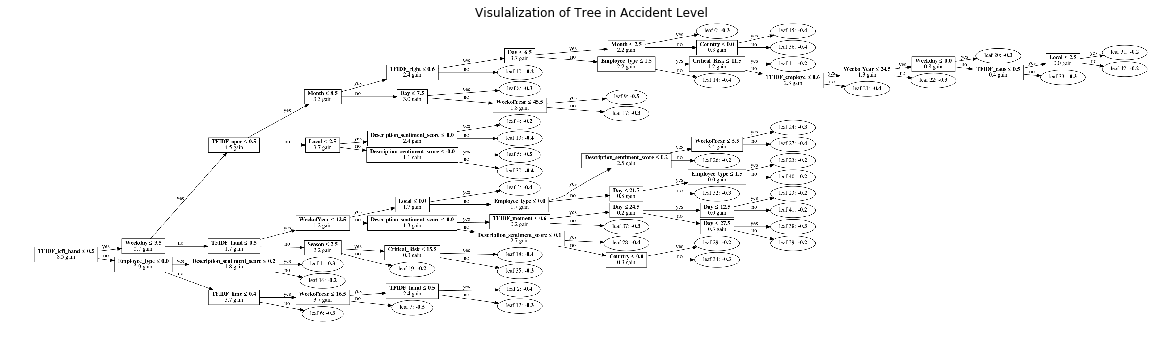

In [ ]:
t = lgb.plot_tree(gbm_ac, figsize=(20, 20), precision=1, tree_index=0, show_info=['split_gain'])
plt.title('Visulalization of Tree in Accident Level')
plt.show()

<a href="#top" class="btn btn-success btn-sm active" role="button" aria-pressed="true" style="color:white;">Table of Contents</a>

## Case2 : Potential Accident Level<a id='pac'></a>
><div class="alert alert-success" role="alert">
><ul>
><li>Similar to the model of Accident Level above, the features of time series and TFIDF features of hands are highly important, but the TFIDF features seem to be slightly more important.</li>
></ul>
></div>

In [ ]:
_feature_df = feature_df[~feature_df['Potential Accident Level'].isin([5])]
y_series = _feature_df['Potential Accident Level']
x_df = _feature_df.drop(['Accident Level','Potential Accident Level'], axis=1)
X_train, X_valid, Y_train, Y_valid = train_test_split(x_df, y_series, test_size=0.2, random_state=0, stratify=y_series)

lgb_train = lgb.Dataset(X_train, Y_train)
lgb_valid = lgb.Dataset(X_valid, Y_valid, reference=lgb_train)

In [ ]:
params = {
    'task' : 'train',
    'boosting' : 'gbdt',
    'objective': 'multiclass',
    'num_class': 5,
    'metric': 'multi_logloss',
    'num_leaves': 200,
    'feature_fraction': 1.0,
    'bagging_fraction': 1.0,
    'bagging_freq': 0,
    'min_child_samples': 5
}
gbm_pac = lgb.train(params,
            lgb_train,
            num_boost_round=100,
            valid_sets=lgb_valid,
            early_stopping_rounds=100)

[1]	valid_0's multi_logloss: 1.4417
Training until validation scores don't improve for 100 rounds
[2]	valid_0's multi_logloss: 1.41462
[3]	valid_0's multi_logloss: 1.39867
[4]	valid_0's multi_logloss: 1.37345
[5]	valid_0's multi_logloss: 1.36902
[6]	valid_0's multi_logloss: 1.35882
[7]	valid_0's multi_logloss: 1.35215
[8]	valid_0's multi_logloss: 1.34559
[9]	valid_0's multi_logloss: 1.34035
[10]	valid_0's multi_logloss: 1.34179
[11]	valid_0's multi_logloss: 1.34141
[12]	valid_0's multi_logloss: 1.34085
[13]	valid_0's multi_logloss: 1.34242
[14]	valid_0's multi_logloss: 1.34313
[15]	valid_0's multi_logloss: 1.34575
[16]	valid_0's multi_logloss: 1.34118
[17]	valid_0's multi_logloss: 1.33979
[18]	valid_0's multi_logloss: 1.34415
[19]	valid_0's multi_logloss: 1.34548
[20]	valid_0's multi_logloss: 1.34857
[21]	valid_0's multi_logloss: 1.34678
[22]	valid_0's multi_logloss: 1.34958
[23]	valid_0's multi_logloss: 1.34627
[24]	valid_0's multi_logloss: 1.34495
[25]	valid_0's multi_logloss: 1.3499

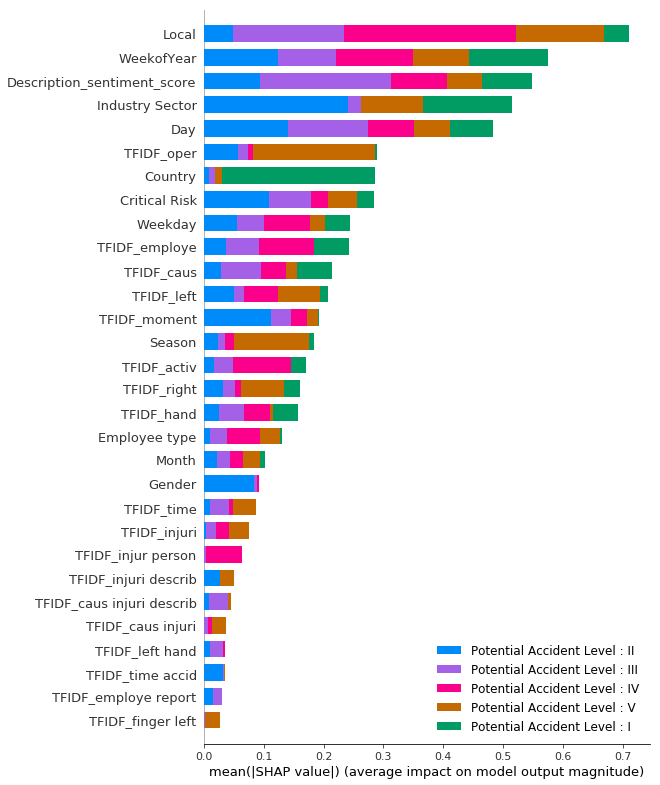

In [ ]:
pac_label = ['Potential Accident Level : I','Potential Accident Level : II','Potential Accident Level : III','Potential Accident Level : IV','Potential Accident Level : V']
explainer = shap.TreeExplainer(model=gbm_pac)
shap_values_pac = explainer.shap_values(X=X_train)
shap.summary_plot(shap_values=shap_values_pac, features=X_train, feature_names=X_train.columns, plot_type="bar", max_display=30, class_names=pac_label)

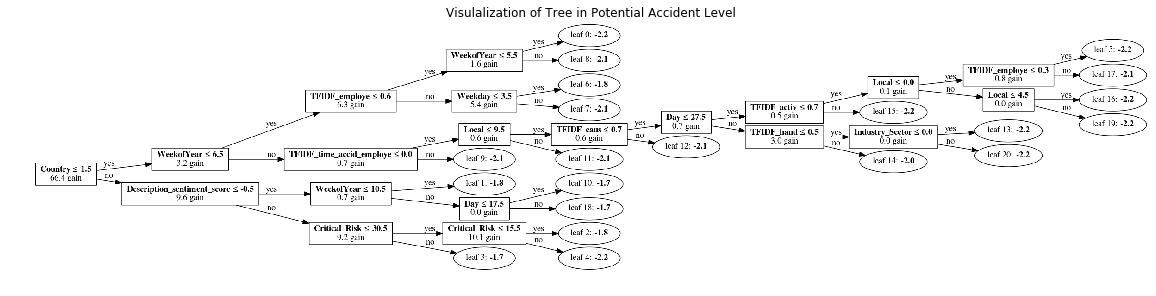

In [ ]:
t = lgb.plot_tree(gbm_pac, figsize=(20, 20), precision=1, tree_index=0, show_info=['split_gain'])
plt.title('Visulalization of Tree in Potential Accident Level')
plt.show()

<a href="#top" class="btn btn-success btn-sm active" role="button" aria-pressed="true" style="color:white;">Table of Contents</a>

# 7. Conclusion
><div class="alert alert-success" role="alert">
><ul>
><li>In this project, we discovered that the main causes of accidents are <b>mistakes in hand-operation and time-related factor</b>.</li>
><li>To reduce the occurrences of accidents, <u>more stringent safety standards in hand-operation will be needed in period when many accidents occur</u>.</li>
></ul>
><ul>
><li>I realized that the detail information of accidents like 'Description' are so useful to analyze the cause.</li>
><li>With more detailed information such as <b>machining data(ex. CNC, Current, Voltage) in plants, weather information, employee's personal data(ex. age, experience in the industry sector, work performance
)</b>, we can clarify the cause of accidents more correctly.</li>
></ul>
></div>

## Task Submission
>Through the EDA & Modeling above, we can answer [several tasks](https://www.kaggle.com/ihmstefanini/industrial-safety-and-health-analytics-database/tasks).

### Gender mostly involved in accidents
><div class="alert alert-info" role="alert">
>In <a href='https://www.kaggle.com/ihmstefanini/industrial-safety-and-health-analytics-database/tasks?taskId=240'>this task</a>, the question is : <b>Which gender is mostly involved in accidents at these plants?</b><br/>
>Answer : <b>Male</b><br/><br/>
><ul>
><li>Though the staffs of the manufacturing plants are mostly males, <u>EDA shows that <b>males</b> are likely involved in accidents(95%)</u>.</li>
><li>And males are tend to get involved in accidents with higher risk levels than females.</li>
></ul>
></div>

In [ ]:
f1 = lambda x : np.round(x/len(df) * 100)
gender_cnt = df.groupby(['Gender'])['Accident Level'].count().apply(f1)
g = hv.Bars(pd.melt(gender_cnt.reset_index(), ['Gender']), ['Gender'], 'value').opts(opts.Bars(title="Gender Count", color='green'))

f2 = lambda x : np.round(x/x.sum() * 100)
ac_gen = df.groupby(['Gender','Accident Level'])['Accident Level'].count().unstack().apply(f2, axis=1)
ac = hv.Bars(pd.melt(ac_gen.reset_index(), ['Gender']), ['Gender','Accident Level'], 'value').opts(opts.Bars(title="Accident Level by Gender Count"))

(g + ac).opts(opts.Bars(width=400, height=300,tools=['hover'],show_grid=True,xrotation=0, ylabel="Percentage", yformatter='%d%%', shared_axes=True))

:Layout
   .Bars.I  :Bars   [Gender]   (value)
   .Bars.II :Bars   [Gender,Accident Level]   (value)

### Third Parties Or Employees?
><div class="alert alert-info" role="alert">
>In <a href='https://www.kaggle.com/ihmstefanini/industrial-safety-and-health-analytics-database/tasks?taskId=241'>this task</a>, the question is : <b>Are third parties usually involved in these accidents or it is mainly the employees?</b><br/>
>Answer : <b>Yes, they are. Third parties more likely get involved in accidents.</b><br/><br/>
><ul>
><li>Comparing employee's accidents count with third parties' accidents count, <u>EDA shows that <b>third parties</b> are likely involved in accidents(58%)</u>.</li>
><li>And third parties are slightly tend to get involved in accidents with higer risk levels than employee.</li>
></ul>
></div>

In [ ]:
df_em_tmp = df.copy()
df_em_tmp.loc[df_em_tmp['Employee type'].isin(['Third Party','Third Party (Remote)']), 'Employee type'] = 'Third Party(+Remote)'
f1 = lambda x : np.round(x/len(df_em_tmp) * 100)
emp_type_cnt = df_em_tmp.groupby(['Employee type'])['Accident Level'].count().apply(f1)
g = hv.Bars(pd.melt(emp_type_cnt.reset_index(), ['Employee type']), ['Employee type'], 'value').opts(opts.Bars(title="Employee type Count", color='green'))


f2 = lambda x : np.round(x/x.sum() * 100)
ac_em = df_em_tmp.groupby(['Employee type','Accident Level'])['Accident Level'].count().unstack().apply(f2, axis=1)
ac = hv.Bars(pd.melt(ac_em.reset_index(), ['Employee type']), ['Employee type','Accident Level'], 'value').opts(opts.Bars(title="Accident Level by Employee type Count"))
(g + ac).opts(opts.Bars(width=400, height=300,tools=['hover'],show_grid=True,xrotation=0, ylabel="Percentage", yformatter='%d%%',fontsize={'title':9}))

:Layout
   .Bars.I  :Bars   [Employee type]   (value)
   .Bars.II :Bars   [Employee type,Accident Level]   (value)

<a href="#top" class="btn btn-success btn-sm active" role="button" aria-pressed="true" style="color:white;">Table of Contents</a>

### Main cause of accidents
><div class="alert alert-info" role="alert">
>In <a href='https://www.kaggle.com/ihmstefanini/industrial-safety-and-health-analytics-database/tasks?taskId=242'>this task</a>, the question is : <b>What usually causes these accidents?</b><br/>
>Answer : <b>Mistakes in hands operations.</b><br/><br/>
><ul>
><li>According to Ngram analysis, we can say that <u>operations related to hands are mainly the causes of accidents</u>.</li>
><li>According to the modeling to classify accident levels shows that in addition to hands-operation, time-related features also affect to the occurrence of accidents.</li>
></ul>
></div>

In [ ]:
uni=hv.Bars(ngram_func(1)[0:15][::-1]).opts(title="Unigram Count", color="red", xlabel="Unigrams", ylabel="Count")
bi=hv.Bars(ngram_func(2)[0:15][::-1]).opts(title="Bigram Count", color="yellow", xlabel="Bigrams", ylabel="Count")
tri=hv.Bars(ngram_func(3)[0:15][::-1]).opts(title="Trigram Count", color="blue", xlabel="Trigrams", ylabel="Count")
(uni + bi + tri).opts(opts.Bars(width=265, height=300,tools=['hover'],show_grid=True,invert_axes=True, shared_axes=False)).opts(shared_axes=False)

:Layout
   .Bars.I   :Bars   [index]   (count)
   .Bars.II  :Bars   [index]   (count)
   .Bars.III :Bars   [index]   (count)

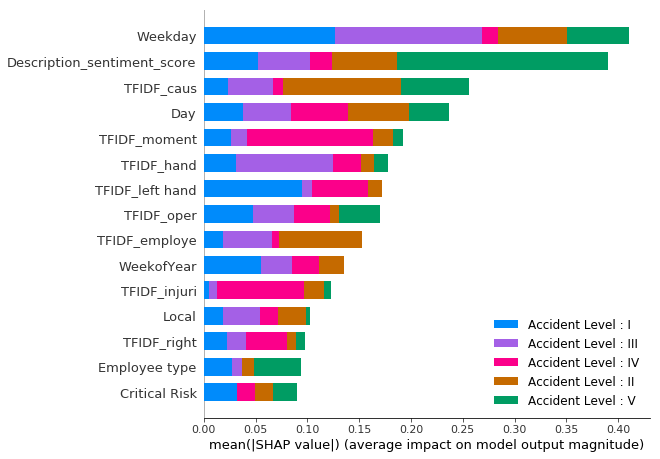

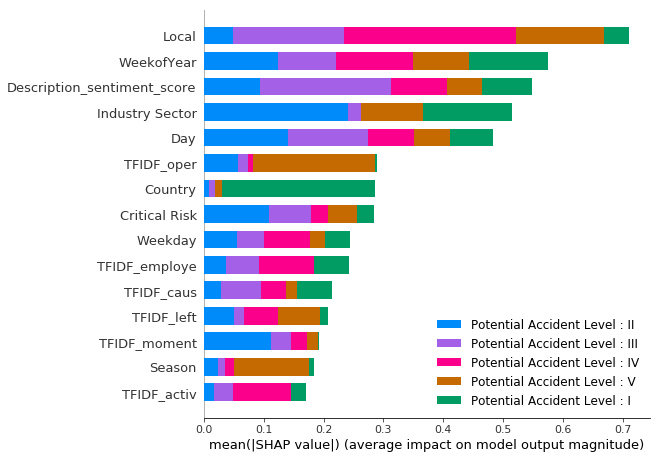

In [ ]:
shap.summary_plot(shap_values=shap_values_ac, features=X_train, feature_names=X_train.columns, plot_type="bar", max_display=15, class_names=ac_label)
shap.summary_plot(shap_values=shap_values_pac, features=X_train, feature_names=X_train.columns, plot_type="bar", max_display=15, class_names=pac_label)

<a href="#top" class="btn btn-success btn-sm active" role="button" aria-pressed="true" style="color:white;">Table of Contents</a>

# 8. References
>* **Good EDA Notebook**  
>https://www.kaggle.com/schorsi/industrial-safety-totw  
>https://www.kaggle.com/schorsi/industrial-safety-totw-part-2
>* **Pandas value_counts() tips**  
>https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html
>* **Holoviews plot tips**  
>http://holoviews.org/user_guide/Customizing_Plots.html
>* **NLP Pre-processing tutorial**  
>http://haya14busa.com/python-nltk-natural-language-processing/
>* **WORDCLOUD example**  
>https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5  
>* **LightGBM Parameters**  
>https://lightgbm.readthedocs.io/en/latest/Parameters.html
>* **LightGBM Tree Visulizing**  
>https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.plot_tree.html

<a href="#top" class="btn btn-success btn-sm active" role="button" aria-pressed="true" style="color:white;">Table of Contents</a>